In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Paths to cleaned data
folder_path = "/Users/milkiyassolo/Documents/10acc/Trial_Noava_financial_solutions_Project/cleaned_data"

# Load all cleaned CSV files
cleaned_dataframes = {}
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        cleaned_dataframes[file] = pd.read_csv(file_path)

# News data (raw_analyst_ratings.csv)
news_data = cleaned_dataframes.get("raw_analyst_ratings.csv")

# Historical data (e.g., *_historical_data.csv)
historical_data = {
    key: df for key, df in cleaned_dataframes.items() if key != "raw_analyst_ratings.csv"
}


In [3]:
# -----------------
# EDA for News Data
# -----------------
print("\nNews Data Info:")
print(news_data.info())

# Convert date column to datetime
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

# Check for missing or duplicate data
print("\nMissing Values in News Data:")
print(news_data.isnull().sum())
news_data = news_data.drop_duplicates()


News Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

Missing Values in News Data:
Unnamed: 0          0
headline            0
url                 0
publisher           0
date          1351341
stock               0
dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# List of the 7 stock symbols
target_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

In [8]:
# Filter the news_data to include only the articles for these stocks
filtered_data = news_data[news_data['stock'].isin(target_stocks)]

In [9]:
# Count the number of articles per stock symbol
article_count_by_stock = filtered_data['stock'].value_counts()

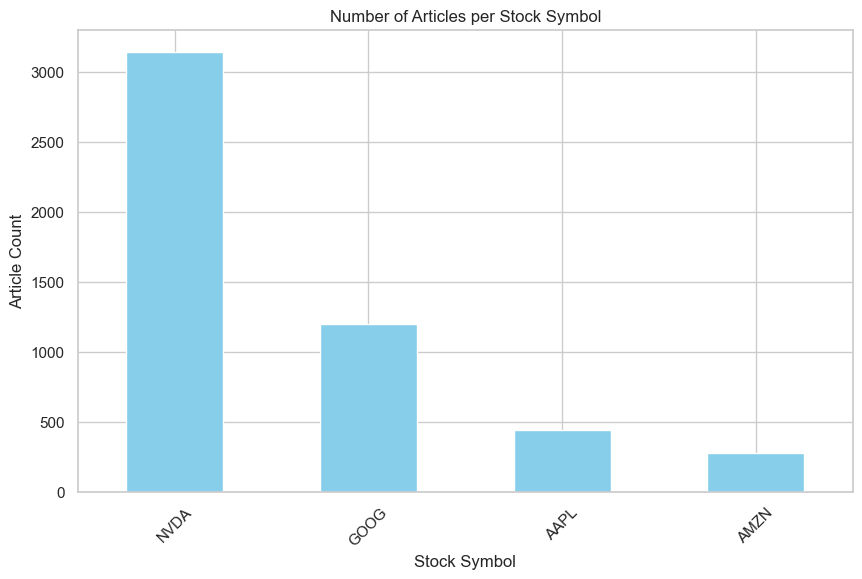

In [10]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
article_count_by_stock.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# so what we got here is that we didnt get the Tesla (which is not included by typing error) and the other is MSFT microsoft 
#and META, the solution is just to do exploratory method and list it in a table like bellow 

In [11]:
#Print the counts for clarity
print(article_count_by_stock)

stock
NVDA    3146
GOOG    1199
AAPL     441
AMZN     278
Name: count, dtype: int64


so still we are not geting the missed values so we have to check for case sensetivity if they are writen in lowrcase or something elese 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of the 7 stock symbols
target_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']

# Filter the news_data to include only the articles for these stocks
filtered_data = news_data[news_data['stock'].isin(target_stocks)]

# Count the number of articles per stock symbol
article_count_by_stock = filtered_data['stock'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
article_count_by_stock.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

# Optional: Print the counts for clarity
print(article_count_by_stock)


In [12]:
print(news_data['stock'].unique())

['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']


In [13]:
print(news_data['stock'].unique())  # This will show all the unique stock symbols


['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']


In [ ]:
import pandas as pd

# Set pandas to display all rows (or a large number of rows)
pd.set_option('display.max_rows', None)  # This will show all rows

# Print the unique stock symbols
print(news_data['stock'].unique())

# If you want to see the count of each stock symbol, you can use:
print(news_data['stock'].value_counts())


In [15]:
missing_stocks = ['TSLA', 'MSFT', 'META']
print(news_data[news_data['stock'].isin(missing_stocks)].shape)


(1875, 6)


In [16]:
news_data['stock'] = news_data['stock'].str.upper()


In [17]:
print(news_data['stock'].unique())


['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']


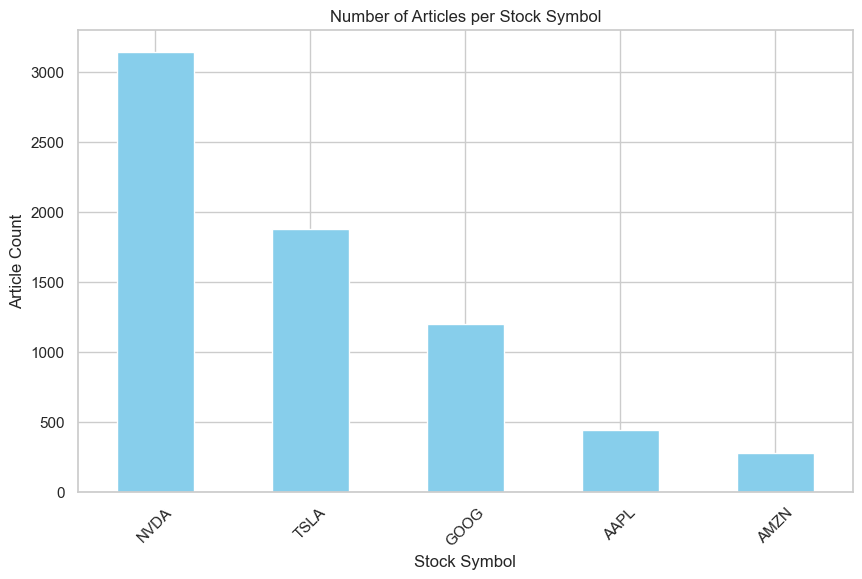

stock
NVDA    3146
TSLA    1875
GOOG    1199
AAPL     441
AMZN     278
Name: count, dtype: int64


In [19]:
# List of target stocks
target_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

# Filter the news_data to include only the articles for these stocks
filtered_data = news_data[news_data['stock'].isin(target_stocks)]

# Count the number of articles per stock symbol
article_count_by_stock = filtered_data['stock'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
article_count_by_stock.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

# Print the counts for clarity
print(article_count_by_stock)


In [ ]:
#still we didnt get the MSFT and META so we should have to try to alternative names 

In [20]:
alternative_stocks = ['META', 'FB', 'MSFT', 'MICROSOFT']
filtered_data = news_data[news_data['stock'].isin(alternative_stocks)]
print(filtered_data['stock'].value_counts())


stock
FB    380
Name: count, dtype: int64


and then we got the FB which could be the alternative name for meta since meta is the new name of facebook which is 
know with the name of FB

In [22]:
missing_stocks = ['META', 'MSFT']
missing_data = news_data[news_data['stock'].isin(missing_stocks)]
print(missing_data)


Empty DataFrame
Columns: [Unnamed: 0, headline, url, publisher, date, stock]
Index: []


then runing again the code to include FB in the graph, to see how many articles are posted in about the company stok

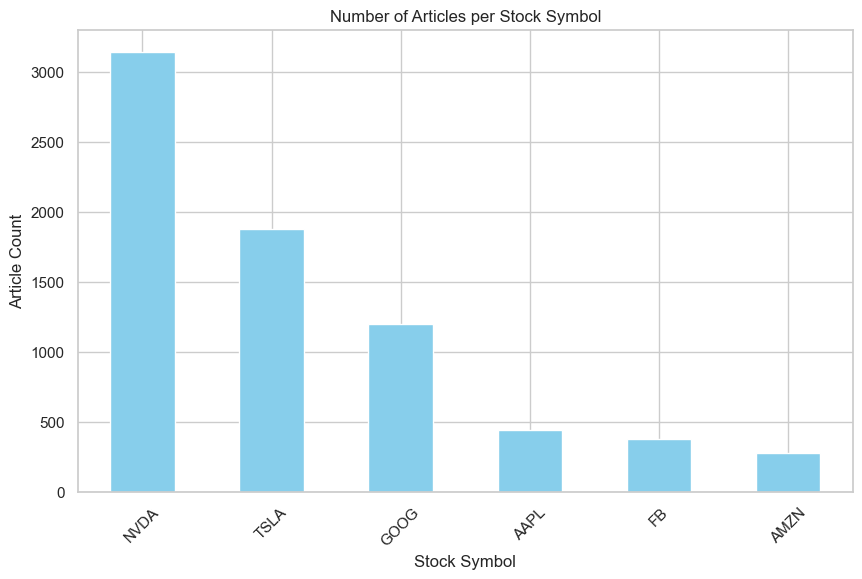

stock
NVDA    3146
TSLA    1875
GOOG    1199
AAPL     441
FB       380
AMZN     278
Name: count, dtype: int64


In [23]:
# List of target stocks, including potential alternative names
target_stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'FB', 'MSFT', 'MICROSOFT', 'NVDA', 'TSLA']

# Filter the news_data to include only the articles for these stocks
filtered_data = news_data[news_data['stock'].isin(target_stocks)]

# Count the number of articles per stock symbol
article_count_by_stock = filtered_data['stock'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
article_count_by_stock.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Article Count')
plt.xticks(rotation=45)
plt.show()

# Print the counts for clarity
print(article_count_by_stock)


lets continue to find another alternative name for Microsoft

In [24]:
alternative_msft_stocks = ['MSFT', 'MICROSOFT', 'MSF', 'MS']
filtered_msft_data = news_data[news_data['stock'].isin(alternative_msft_stocks)]
print(filtered_msft_data['stock'].value_counts())


stock
MS     3238
MSF      12
Name: count, dtype: int64


## As mentioned above we got the possible alternative so we take MSF as Microsoft stock simbol then run it again

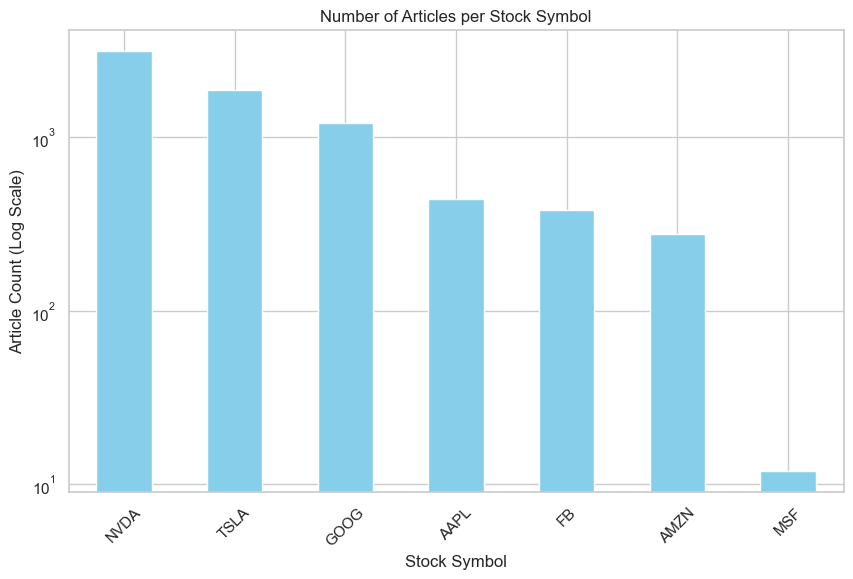

stock
NVDA    3146
TSLA    1875
GOOG    1199
AAPL     441
FB       380
AMZN     278
MSF       12
Name: count, dtype: int64


In [25]:
# List of target stocks, excluding 'MS' and including 'MSF' for Microsoft
target_stocks = ['AAPL', 'AMZN', 'GOOG', 'FB', 'MSF', 'NVDA', 'TSLA']

# Filter the news_data to include only the articles for these stocks
filtered_data = news_data[news_data['stock'].isin(target_stocks)]

# Count the number of articles per stock symbol
article_count_by_stock = filtered_data['stock'].value_counts()

# Plot the bar chart with a log scale for better comparison
plt.figure(figsize=(10, 6))
article_count_by_stock.plot(kind='bar', color='skyblue')

# Set log scale for Y-axis for better visualization of large differences
plt.yscale('log')

# Title and labels
plt.title('Number of Articles per Stock Symbol')
plt.xlabel('Stock Symbol')
plt.ylabel('Article Count (Log Scale)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Print the counts for clarity
print(article_count_by_stock)


publisher
Paul Quintaro                                     228373
Lisa Levin                                        186979
Benzinga Newsdesk                                 150484
Charles Gross                                      96732
Monica Gerson                                      82380
Eddie Staley                                       57254
Hal Lindon                                         49047
ETF Professor                                      28489
Juan Lopez                                         28438
Benzinga Staff                                     28114
Vick Meyer                                         24826
webmaster                                          20313
Benzinga_Newsdesk                                  19410
Zacks                                              19390
Jayson Derrick                                     19050
Allie Wickman                                      18317
Shanthi Rexaline                                   16640
Craig Jones          

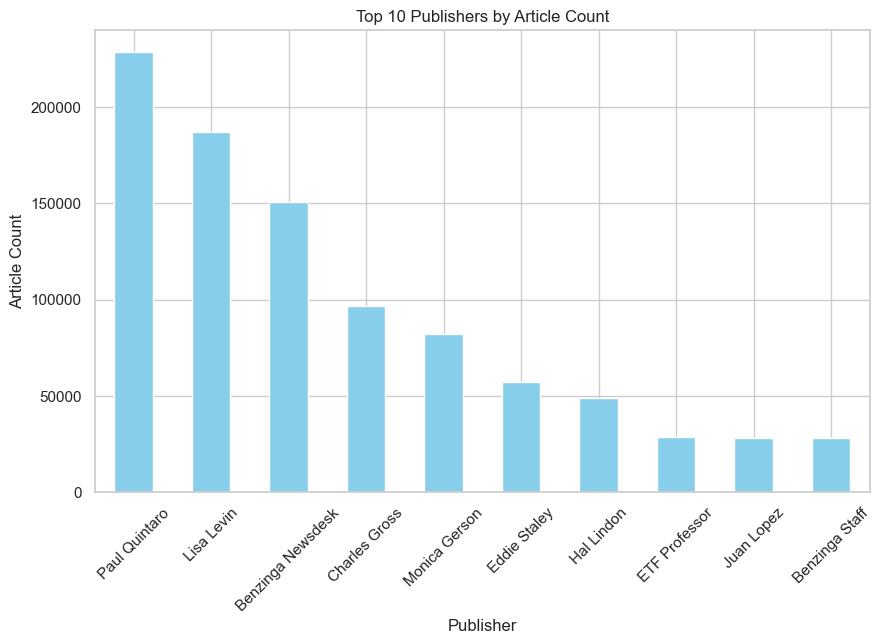

In [28]:
# Count the number of articles per publisher
article_count_by_publisher = news_data['publisher'].value_counts()

# Display the article count for each publisher
print(article_count_by_publisher)

# Plot the bar chart for publisher article counts
plt.figure(figsize=(10, 6))
article_count_by_publisher.head(10).plot(kind='bar', color='skyblue')  # Display top 10 publishers

# Title and labels
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()


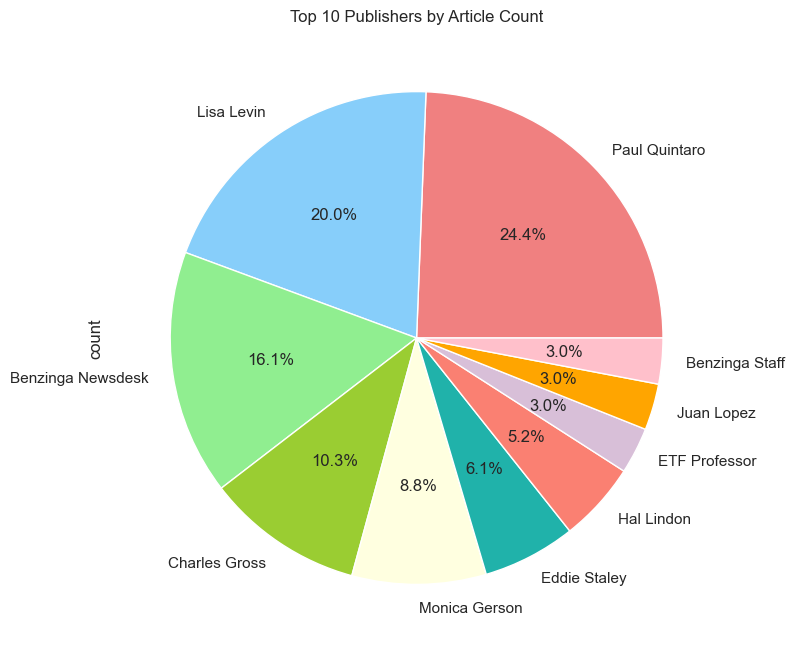

In [33]:
# Count the number of articles per publisher
article_count_by_publisher = news_data['publisher'].value_counts()

# Get the top 10 publishers
top_10_publishers = article_count_by_publisher.head(10)

# Plot the pie chart for the top 10 publishers
plt.figure(figsize=(8, 8))
top_10_publishers.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'yellowgreen', 'lightyellow', 'lightseagreen', 'salmon', 'thistle', 'orange', 'pink'])

# Title for pie chart
plt.title('Top 10 Publishers by Article Count')

# Display the plot
plt.show()


publisher
Paul Quintaro           228373
Lisa Levin              186979
Benzinga Newsdesk       150484
Charles Gross            96732
Monica Gerson            82380
Eddie Staley             57254
Hal Lindon               49047
ETF Professor            28489
Juan Lopez               28438
Benzinga Staff           28114
Vick Meyer               24826
webmaster                20313
Benzinga_Newsdesk        19410
Zacks                    19390
Jayson Derrick           19050
Allie Wickman            18317
Shanthi Rexaline         16640
Craig Jones              16221
Wayne Duggan             12897
Nelson Hem               12590
Dwight Einhorn           12226
Michael J. Zerinskas     10892
Joe Young                10777
Name: count, dtype: int64


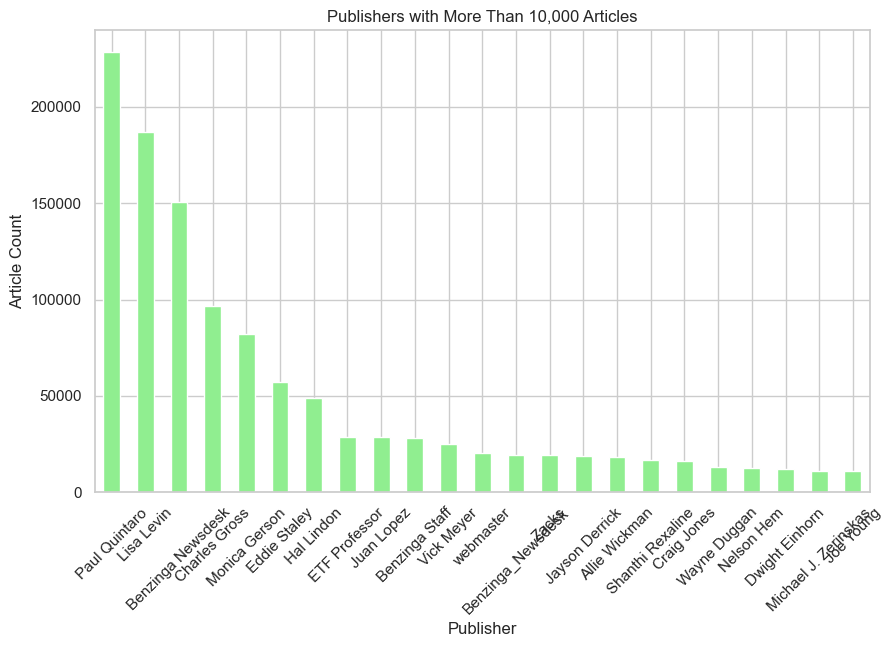

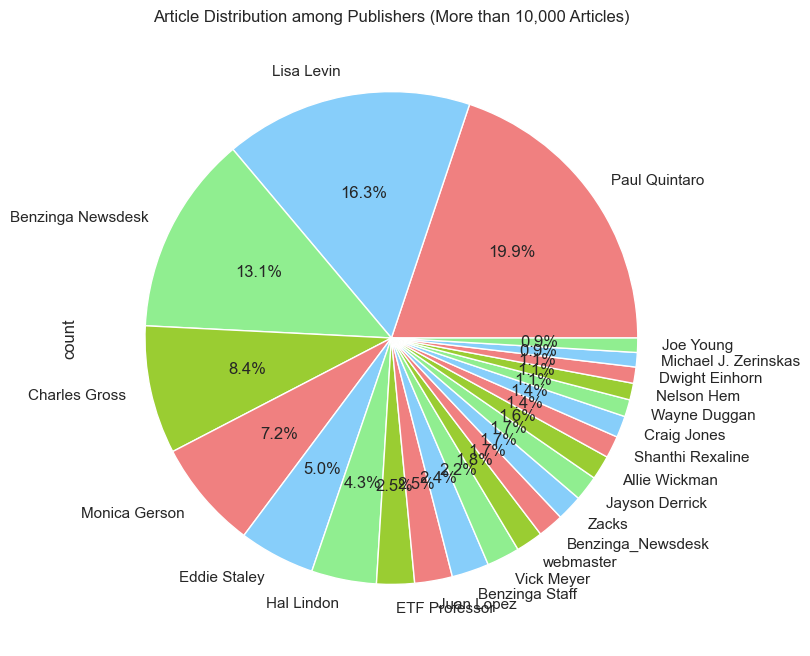

In [31]:
# Filter the publishers who have published more than 1000 articles
active_publishers = article_count_by_publisher[article_count_by_publisher > 10000]

# Print the filtered data to see the publishers with more than 1000 articles
print(active_publishers)

# Bar Chart of publishers with more than 1000 articles
plt.figure(figsize=(10, 6))
active_publishers.plot(kind='bar', color='lightgreen')

# Title and labels
plt.title('Publishers with More Than 10,000 Articles')
plt.xlabel('Publisher')
plt.ylabel('Article Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Pie chart to show the distribution of articles among publishers
plt.figure(figsize=(8, 8))
active_publishers.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'yellowgreen'])

# Title for pie chart
plt.title('Article Distribution among Publishers (More than 10,000 Articles)')

# Display the plot
plt.show()


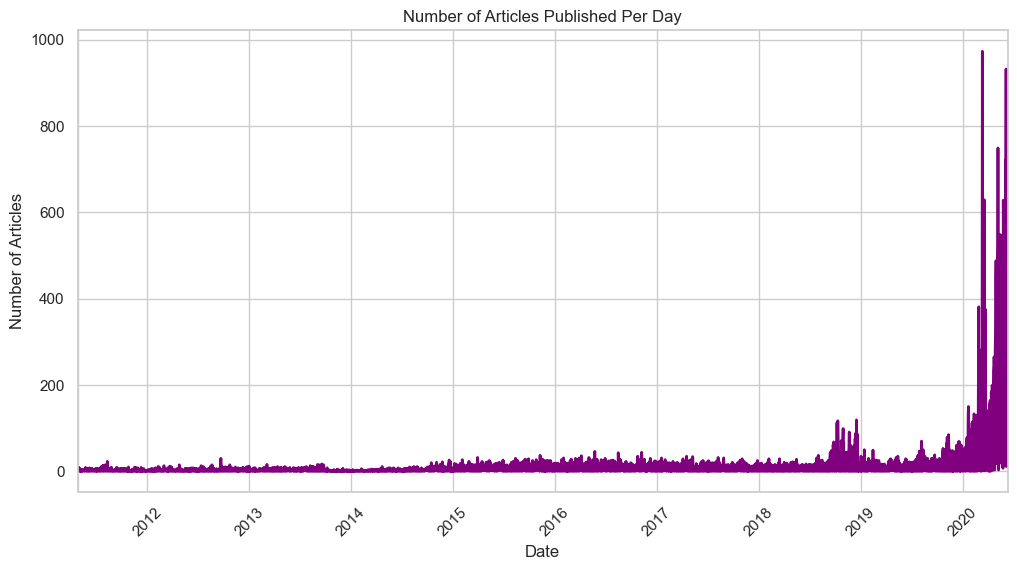

/var/folders/ys/j5hy15g16bjc5b29zsfb5w3c0000gn/T/ipykernel_4370/3409275119.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  articles_per_month = news_data.resample('M', on='date').size()


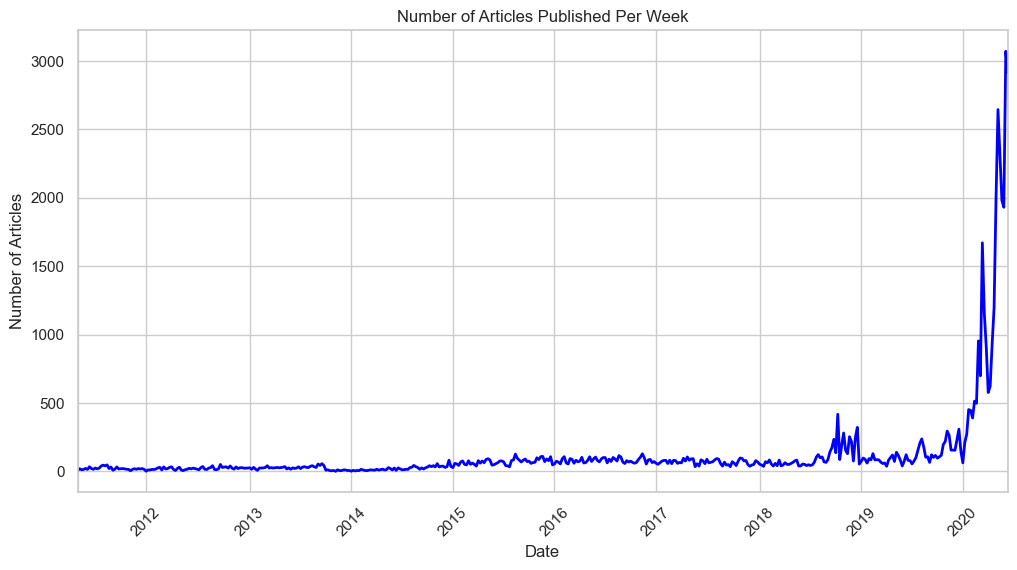

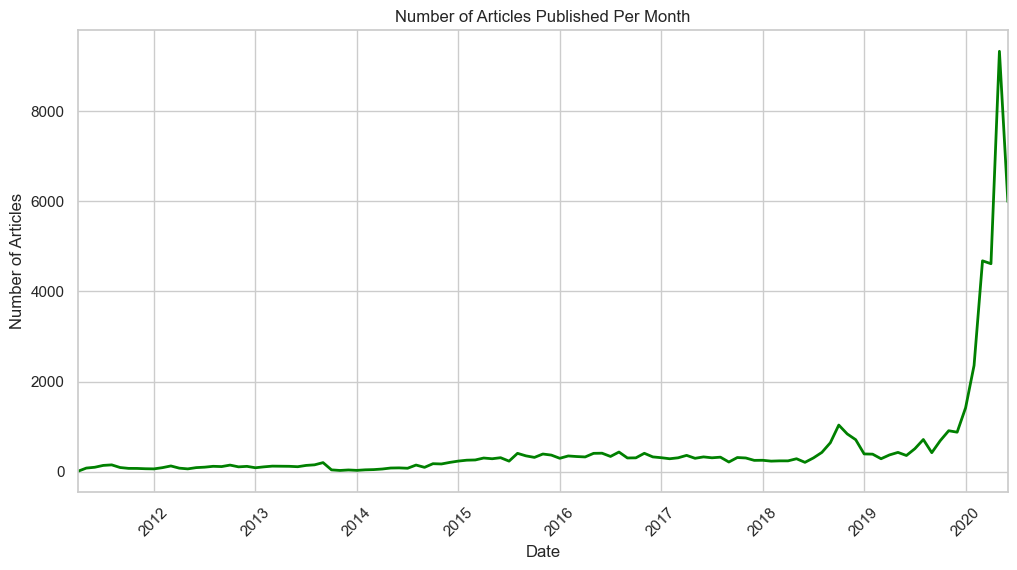

In [32]:
# Convert the 'date' column to datetime format
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

# Resample the data to get the number of articles published per day
articles_per_day = news_data.resample('D', on='date').size()

# Plot the number of articles per day
plt.figure(figsize=(12, 6))
articles_per_day.plot(kind='line', color='purple', linewidth=2)

# Title and labels
plt.title('Number of Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Optionally, you can analyze articles per week or month for a broader view
articles_per_week = news_data.resample('W', on='date').size()
articles_per_month = news_data.resample('M', on='date').size()

# Plot articles per week
plt.figure(figsize=(12, 6))
articles_per_week.plot(kind='line', color='blue', linewidth=2)
plt.title('Number of Articles Published Per Week')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot articles per month
plt.figure(figsize=(12, 6))
articles_per_month.plot(kind='line', color='green', linewidth=2)
plt.title('Number of Articles Published Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Lets move to Text analysis 

SyntaxError: invalid syntax (2785462951.py, line 2)